In [1]:
import torch
import Dataset
import TrainModel
import Result_Analysis
import matplotlib.pyplot as plt
import cv2
import numpy as np
import Models

In [2]:
dataset = Dataset.SupervisedDataSet()
data_loader = torch.utils.data.DataLoader(dataset, 
                            batch_size=8,
                            shuffle=True)

data_loader_iter = iter(data_loader)
x,y = next(data_loader_iter)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'label')

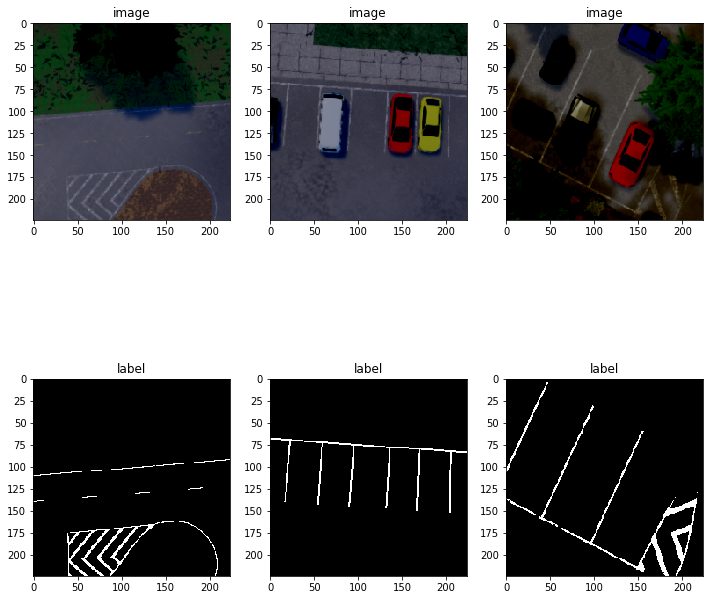

In [3]:
#  test the dataloader and labels 

fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(12,12))

im_1 = x[0,:].clone().detach().numpy() + np.array([0.485, 0.456, 0.406]).reshape(-1,1,1)
im_1 = im_1*np.array([0.229, 0.224, 0.225]).reshape(-1,1,1)
im_1 = np.transpose(im_1, axes=(1,2,0))
ax[0][0].imshow(im_1)
ax[0][0].set_title('image')

im_2 = x[1,:].clone().detach().numpy()+ np.array([0.485, 0.456, 0.406]).reshape(-1,1,1)
im_2 = im_2*np.array([0.229, 0.224, 0.225]).reshape(-1,1,1)
im_2 = np.transpose(im_2, axes=(1,2,0))
ax[0][1].imshow(im_2)
ax[0][1].set_title('image')

im_3 = x[2,:].clone().detach().numpy()+ np.array([0.485, 0.456, 0.406]).reshape(-1,1,1)
im_3 = im_3*np.array([0.229, 0.224, 0.225]).reshape(-1,1,1)
im_3 = np.transpose(im_3, axes=(1,2,0))
ax[0][2].imshow(im_3)
ax[0][2].set_title('image')


lb_1 = y[0,:].clone().detach().numpy()
lb_1 = np.array([lb_1,lb_1,lb_1]).reshape(3,224,224)
lb_1 = np.transpose(lb_1, axes=(1,2,0))
ax[1][0].imshow(lb_1,cmap='gray')
ax[1][0].set_title('label')

lb_2 = y[1,:].clone().detach().numpy()
lb_2 = np.array([lb_2,lb_2,lb_2]).reshape(3,224,224)
lb_2 = np.transpose(lb_2, axes=(1,2,0))
ax[1][1].imshow(lb_2,cmap='gray')
ax[1][1].set_title('label')

lb_3 = y[2,:].clone().detach().numpy()
lb_3 = np.array([lb_3,lb_3,lb_3]).reshape(3,224,224)
lb_3 = np.transpose(lb_3, axes=(1,2,0))
ax[1][2].imshow(lb_3,cmap='gray')
ax[1][2].set_title('label')


In [4]:
# Now we need to test the model and the predict and predict_real_image methods 

In [5]:


#x_target = next(data_loader_iter_target)

In [6]:

#with torch.no_grad():
#    model = Models.ResNetUNet()
#    print(model.predict(x).shape)
#    print(model.predict_real_image(x_target).shape)
#    del model 


In [7]:
# Train function --> train by 3 loss functions 


In [8]:
# prepare arguments for train function 



model_1 = Models.ResNetUNet_RoadSeg()

model_2 = Models.ResNetUNet_RoadSeg()

loss_1 = torch.nn.MSELoss()

In [9]:
dataset_test = Dataset.SupervisedDataSet(image_folder ='patch_dataset/test/images',
                                          label_folder ='patch_dataset/test/labels')
data_loader_test = torch.utils.data.DataLoader(dataset_test, 
                            batch_size=8,
                            shuffle=True)

data_loader_dict_test = {'val':data_loader,
                    'train':data_loader_test}

In [10]:
#metrics_train_dict_1, metrics_val_dict_1 = TrainModel.TrainUnet(data_loader_dict,model_1,loss_1)
#torch.cuda.empty_cache()

In [11]:
#metrics_train_dict_2, metrics_val_dict_2 = TrainModel.TrainUnet(data_loader_dict_test,model_2,loss_1)
#torch.cuda.empty_cache()

In [12]:
metrics_train_dict_3, metrics_val_dict_3 = TrainModel.TrainUnet(data_loader_dict_test,model_1,loss_1)

In [13]:
#metrics_train_dict_4, metrics_val_dict_4 = TrainModel.TrainUnet(data_loader_dict,model,loss_4)

In [14]:
'''
model = Models.ResNetUNet()
model.load_state_dict(torch.load('res_unet_IOU_BCE_Logits.pth'))
out = model(x)

to_check = torch.sigmoid(out) >0.5
to_check = to_check.float()





fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(10,10))

lb_1 = to_check[0,:].clone().detach().numpy()
lb_1 = np.array([lb_1,lb_1,lb_1]).reshape(3,224,224)
lb_1 = np.transpose(lb_1, axes=(1,2,0))
ax[0].imshow(lb_1,cmap='gray')


lb_2 = to_check[1,:].clone().detach().numpy()
lb_2 = np.array([lb_2,lb_2,lb_2]).reshape(3,224,224)
lb_2 = np.transpose(lb_2, axes=(1,2,0))
ax[1].imshow(lb_2,cmap='gray')


lb_3 = to_check[2,:].clone().detach().numpy()
lb_3 = np.array([lb_3,lb_3,lb_3]).reshape(3,224,224)
lb_3 = np.transpose(lb_3, axes=(1,2,0))
ax[2].imshow(lb_3,cmap='gray')

'''

"\nmodel = Models.ResNetUNet()\nmodel.load_state_dict(torch.load('res_unet_IOU_BCE_Logits.pth'))\nout = model(x)\n\nto_check = torch.sigmoid(out) >0.5\nto_check = to_check.float()\n\n\n\n\n\nfig, ax = plt.subplots(nrows=1, ncols=3,figsize=(10,10))\n\nlb_1 = to_check[0,:].clone().detach().numpy()\nlb_1 = np.array([lb_1,lb_1,lb_1]).reshape(3,224,224)\nlb_1 = np.transpose(lb_1, axes=(1,2,0))\nax[0].imshow(lb_1,cmap='gray')\n\n\nlb_2 = to_check[1,:].clone().detach().numpy()\nlb_2 = np.array([lb_2,lb_2,lb_2]).reshape(3,224,224)\nlb_2 = np.transpose(lb_2, axes=(1,2,0))\nax[1].imshow(lb_2,cmap='gray')\n\n\nlb_3 = to_check[2,:].clone().detach().numpy()\nlb_3 = np.array([lb_3,lb_3,lb_3]).reshape(3,224,224)\nlb_3 = np.transpose(lb_3, axes=(1,2,0))\nax[2].imshow(lb_3,cmap='gray')\n\n"

In [35]:
dataset_target = Dataset.TargetImages()
data_loader_target = torch.utils.data.DataLoader(dataset_target, 
                            batch_size=8,
                            shuffle=True)

data_loader_iter_target = iter(data_loader_target)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


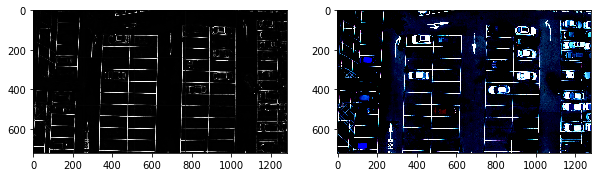

In [36]:
to_show = next(data_loader_iter_target)
model = Models.ResNetUNet_RoadSeg()
val_num = len(data_loader_dict_test['val'])
f_name = f'res_unet_IOU_MSE_{val_num}.pth'
model.load_state_dict(torch.load(f_name))


if torch.cuda.is_available():
    model = model.cuda()
    to_show = to_show.cuda()

with torch.no_grad(): 
    model = model.cuda()
    to_show = to_show.cuda()
    mask = model.predict_real_image(to_show)
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,20))

    lb_1 = mask[0,:].clone().detach().cpu().numpy()
    lb_1 = np.array([lb_1,lb_1,lb_1]).reshape(3,720,1280)
    lb_1 = np.transpose(lb_1, axes=(1,2,0))
    ax[0].imshow(lb_1,cmap='gray')

    im_1 = to_show[0,:].clone().detach().cpu().numpy() 
    im_1 = np.transpose(im_1, axes=(1,2,0))
    ax[1].imshow(im_1)


In [1]:

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(100,100))
lb_1 = mask[0,:].clone().detach().cpu().numpy()
lb_1 = np.array([lb_1,lb_1,lb_1]).reshape(3,720,1280)
lb_1 = np.transpose(lb_1, axes=(1,2,0))
lb_1[lb_1>0.3] = 1
ax.imshow(lb_1,cmap='gray')


NameError: name 'plt' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


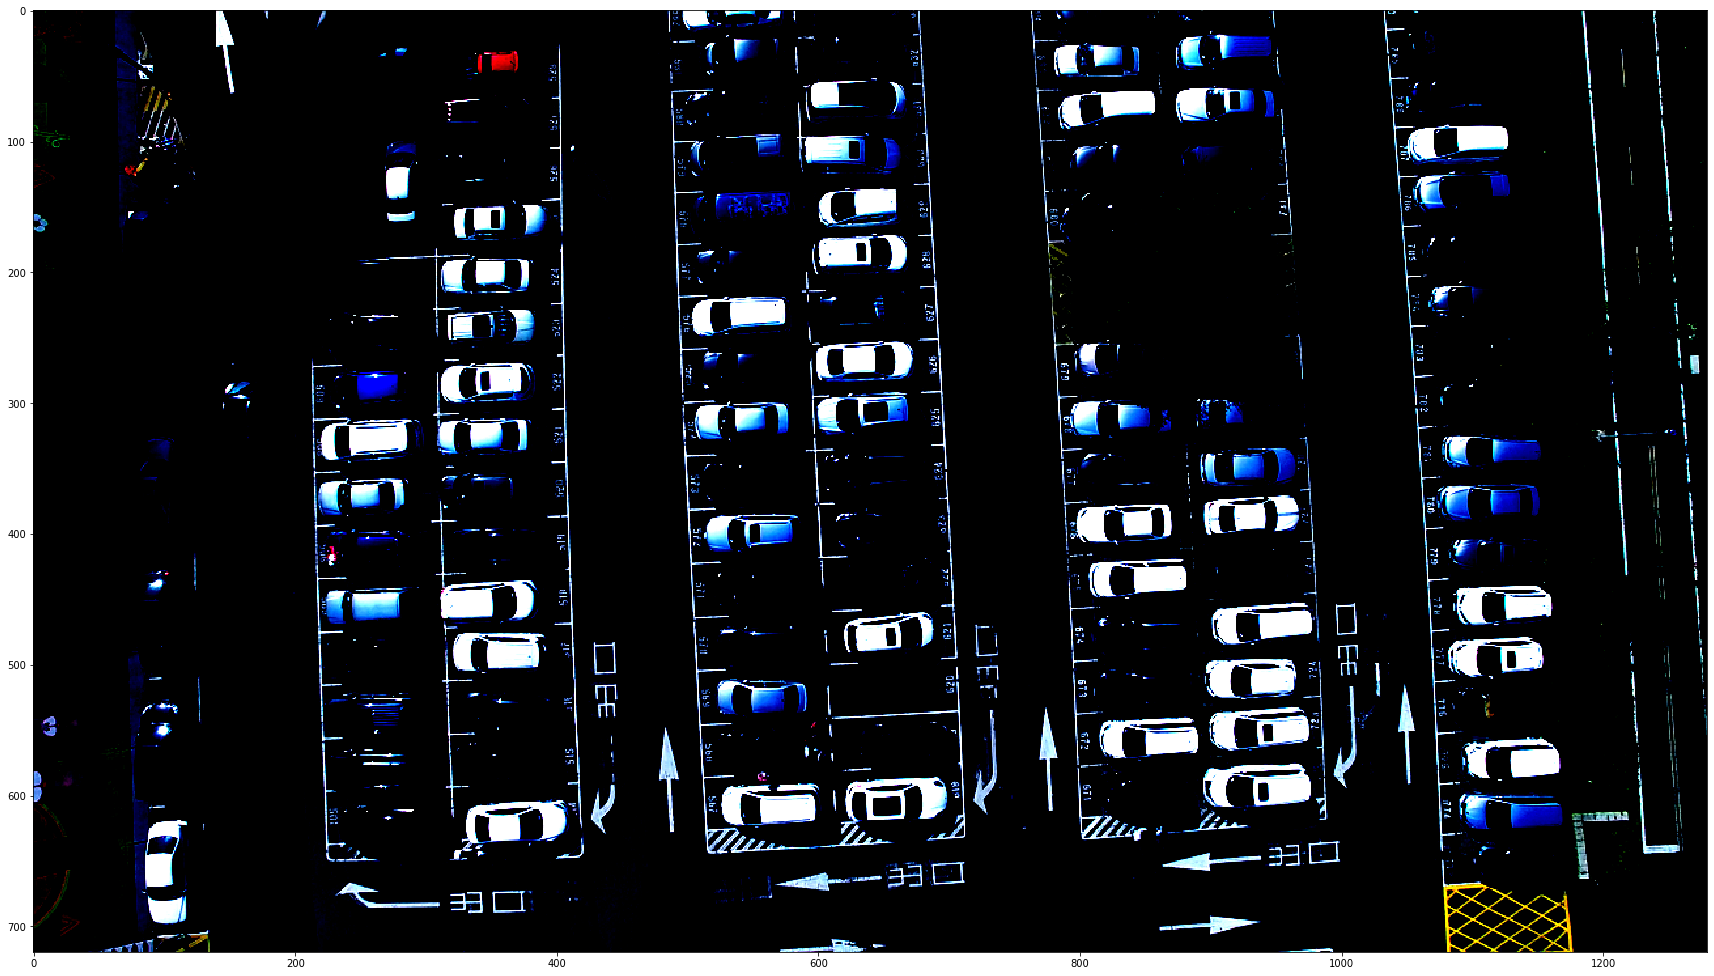

In [18]:

im_1 = to_show[0,:].clone().detach().cpu().numpy() 
im_1 = np.transpose(im_1, axes=(1,2,0))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(30,30))
ax.imshow(im_1)


In [19]:
# Now lets show results from train , validation and test set

In [20]:
# Now lets show results from the target images folder 

In [21]:
# plot the loss functions and the metrics 

In [22]:
import pandas as pd


df_BCE_train = pd.read_csv('MSE_loss_train_1.csv')
df_BCE_val = pd.read_csv('MSE_loss_val_1.csv')

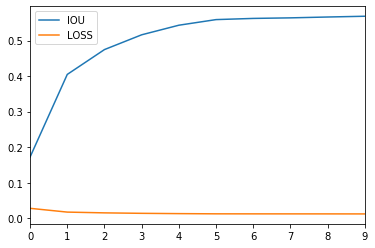

In [23]:
df_BCE_train.drop(df_BCE_train.columns[[0]], axis=1).plot()

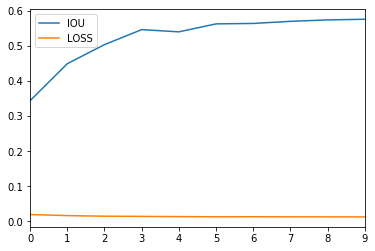

In [24]:
df_BCE_val.drop(df_BCE_val.columns[[0]], axis=1).plot()

In [25]:
import pandas as pd


df_BCE_train = pd.read_csv('MSE_loss_train_2.csv')
df_BCE_val = pd.read_csv('MSE_loss_val_2.csv')

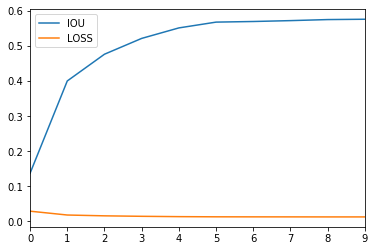

In [26]:
df_BCE_train.drop(df_BCE_train.columns[[0]], axis=1).plot()

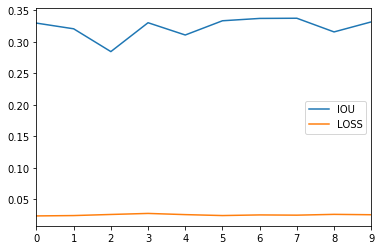

In [27]:
df_BCE_val.drop(df_BCE_val.columns[[0]], axis=1).plot()

In [28]:
Result_Analysis.WriteDictToCsv('MSE_loss_train_3.csv',metrics_train_dict_3)
Result_Analysis.WriteDictToCsv('MSE_loss_val_3.csv',metrics_val_dict_3)
df_BCE_train = pd.read_csv('MSE_loss_train_3.csv')
df_BCE_val = pd.read_csv('MSE_loss_val_3.csv')

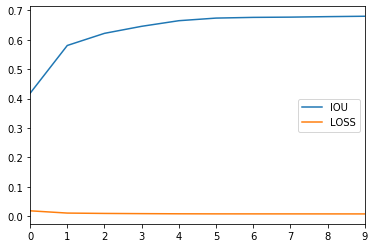

In [29]:
df_BCE_train.drop(df_BCE_train.columns[[0]], axis=1).plot()

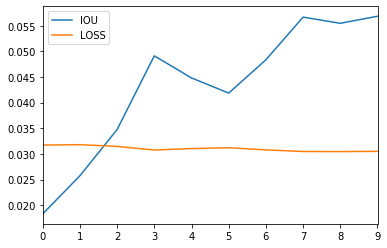

In [30]:
df_BCE_val.drop(df_BCE_val.columns[[0]], axis=1).plot()